<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 170.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 185.1 MB/s eta 0:00:00


In [2]:
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 172.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 149.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 152.6 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-11-25 13:43:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  19.0MB/s    in 6.4s    

2025-11-25 13:43:44 (23.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



In [4]:
#filtering 1-99% to not have the outliers in the data I want to visualize. 
low = df['ConvertedCompYearly'].quantile(0.01)
high = df['ConvertedCompYearly'].quantile(0.99)
df['CompYearlyFiltered'] =  df['ConvertedCompYearly'][(df['ConvertedCompYearly'] >= low) & (df['ConvertedCompYearly'] <= high)]
df['CompYearlyFiltered']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
65432   NaN
65433   NaN
65434   NaN
65435   NaN
65436   NaN
Name: CompYearlyFiltered, Length: 65437, dtype: float64

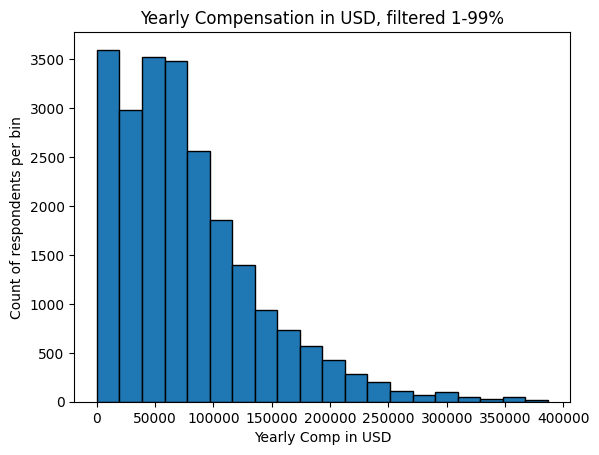

In [5]:
## Write your code here
df['CompYearlyFiltered'].plot(kind = 'hist', bins = 20, edgecolor='black')
plt.title('Yearly Compensation in USD, filtered 1-99%')
plt.xlabel('Yearly Comp in USD')
plt.ylabel('Count of respondents per bin')
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [6]:
## Write your code here
#defining a function to convert the Age column to numeric values

def Age_to_numeric(v):
    if pd.isna(v):
        return np.nan

    elif '25-34 years old' in v:
        return 30
    elif '35-44 years old' in v:
        return 40
    elif '18-24 years old' in v:
        return 22
    elif '45-54 years old' in v:
        return 50
    elif '55-64 years old' in v:
        return 60
    elif 'Under 18 years old' in v:
        return 17
    elif '65 years or older' in v:
        return 67
    elif  'Prefer not to say' in v:
        return 41 #the mean of the other values. 

#applying the function to the age Column and verifying that it worked. 
df['Age_numeric'] = df['Age'].apply(Age_to_numeric)
df['Age_numeric'].describe()

count    65437.000000
mean        33.630790
std         10.974272
min         17.000000
25%         22.000000
50%         30.000000
75%         40.000000
max         67.000000
Name: Age_numeric, dtype: float64

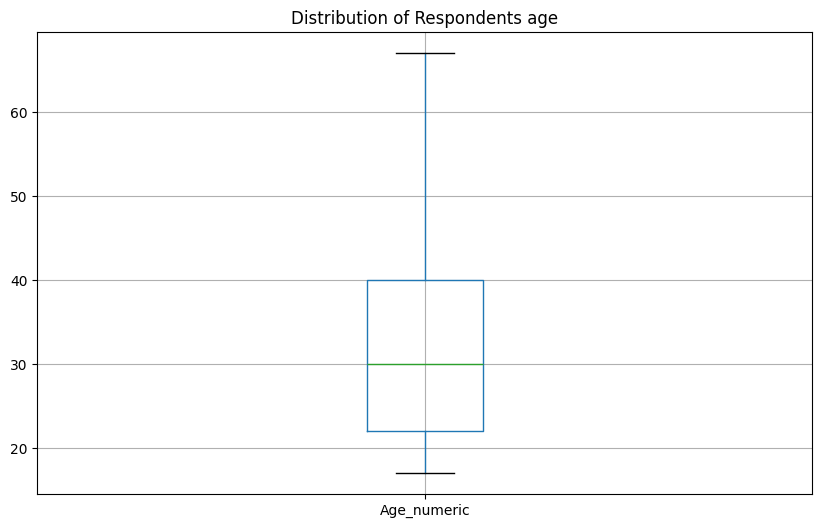

In [7]:
df.boxplot(column = 'Age_numeric', figsize = (10,6))
plt.title('Distribution of Respondents age')
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



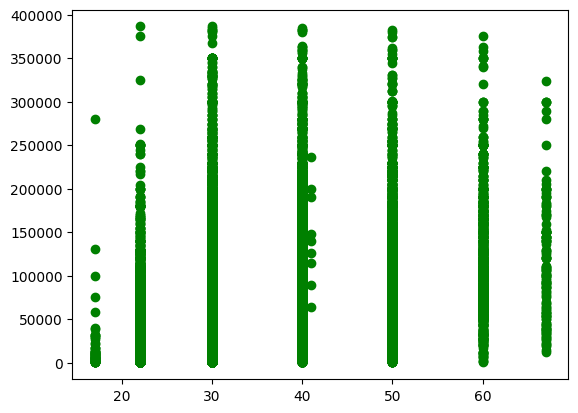

In [8]:
## Write your code here
plt.scatter(df['Age_numeric'],df['CompYearlyFiltered'], color = 'green')
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


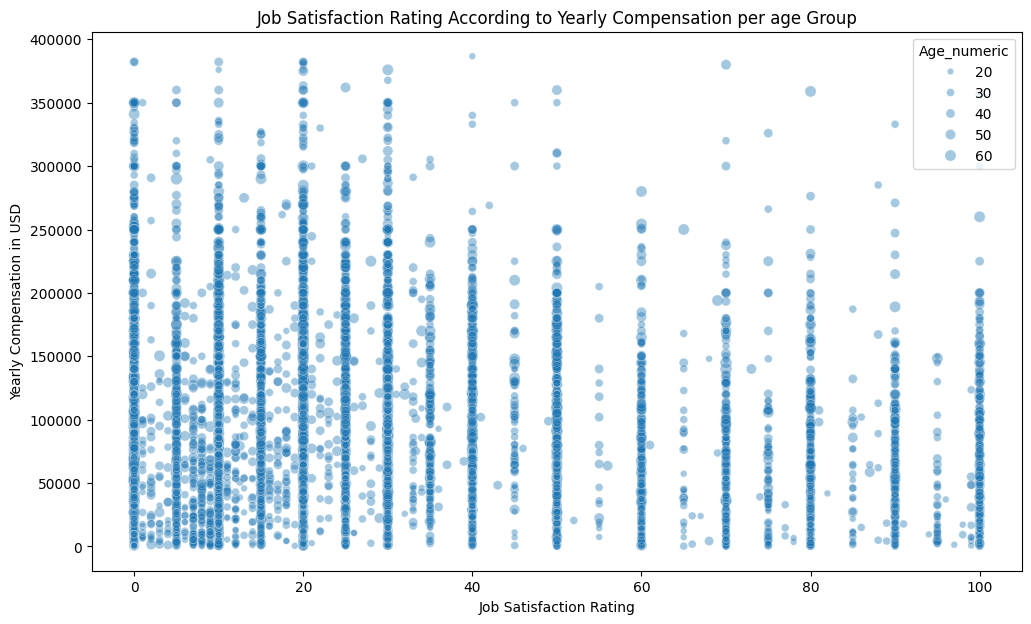

In [9]:
#df['CompYearlyFiltered']
#df['JobSatPoints_6']
#df['Age_numeric']
plt.figure(figsize = (12,7))
sns.scatterplot(data = df,
               x = 'JobSatPoints_6',
               y = 'CompYearlyFiltered',
               size = 'Age_numeric', 
               alpha = 0.4)
plt.title('Job Satisfaction Rating According to Yearly Compensation per age Group')
plt.xlabel('Job Satisfaction Rating')
plt.ylabel('Yearly Compensation in USD')

plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



In [10]:
## Write your code here
df['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64

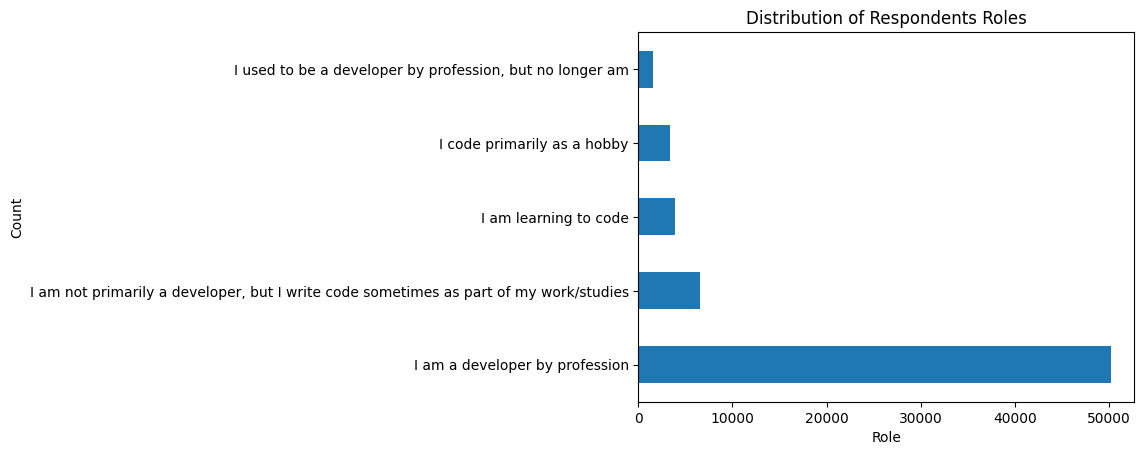

In [11]:
df['MainBranch'].value_counts().plot.barh()
plt.title('Distribution of Respondents Roles')
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



In [12]:
## Write your code here
top5lng = df['LanguageWantToWorkWith'].value_counts().head(5)
top5lng

LanguageWantToWorkWith
Python                            922
Rust                              737
HTML/CSS;JavaScript;TypeScript    632
C#                                538
Go                                460
Name: count, dtype: int64

In [13]:
df5lng = df[df['LanguageWantToWorkWith'].isin(top5lng.index)]
df5lng.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,CompYearlyFiltered,Age_numeric
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,NaN,50
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN,NaN,22
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN,NaN,40
13,14,"I used to be a developer by profession, but no...",35-44 years old,"Not employed, and not looking for work",NaN,Apples,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Other online resources (e.g., videos...",Technical documentation;Blogs;Stack Overflow;I...,...,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN,NaN,40
17,18,I am a developer by profession,18-24 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Blogs;Coding sessions (live or recorded);How-t...,...,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,NaN,22


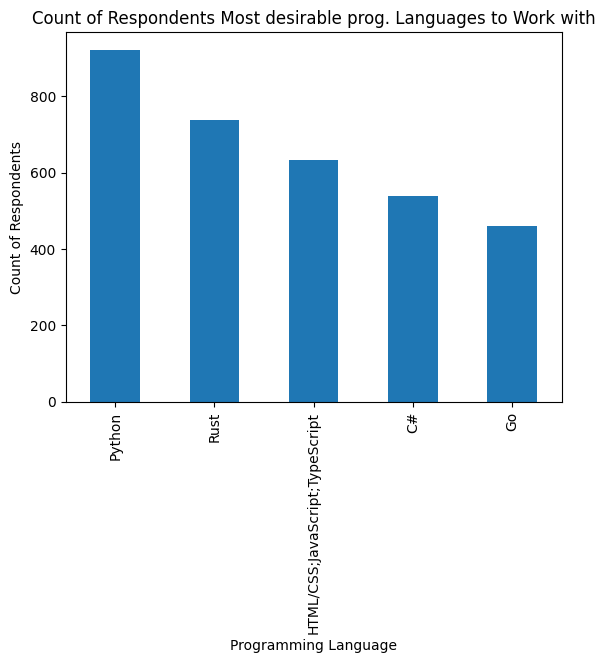

In [14]:
df5lng['LanguageWantToWorkWith'].value_counts().plot.bar()
plt.title('Count of Respondents Most desirable prog. Languages to Work with')
plt.xlabel('Programming Language')
plt.ylabel('Count of Respondents')
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


In [15]:
## Write your code here
medians = df.groupby('Age')[['JobSatPoints_6','JobSatPoints_7']].median()
medians

,JobSatPoints_6,JobSatPoints_7
Age,,
18-24 years old,15.0,20.0
25-34 years old,20.0,15.0
35-44 years old,20.0,15.0
45-54 years old,20.0,15.0
55-64 years old,20.0,20.0
65 years or older,20.0,15.0
Prefer not to say,10.0,7.0
Under 18 years old,1.5,5.0


In [16]:
#ordering the groups for readablility
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]
medians = medians.loc[age_order]

<Figure size 1200x700 with 0 Axes>

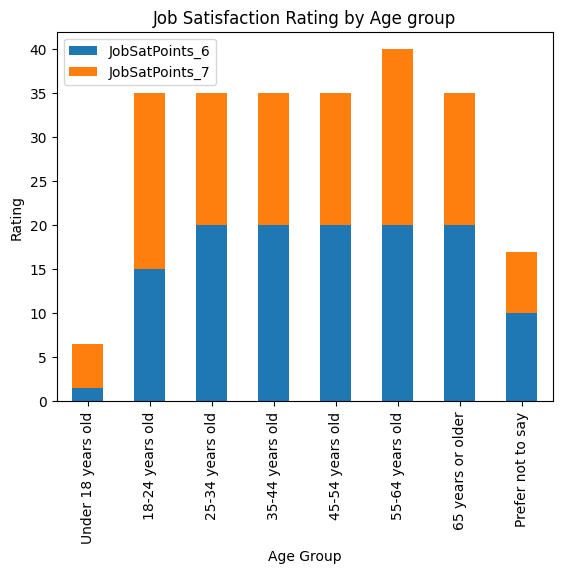

In [17]:
plt.figure(figsize = (12,7))
medians.plot.bar(stacked = True)
plt.title('Job Satisfaction Rating by Age group')
plt.ylabel('Rating')
plt.xlabel('Age Group')
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



In [18]:
top5db = df['DatabaseHaveWorkedWith'].value_counts().head(5)

In [19]:
db_df = df[df['DatabaseHaveWorkedWith'].isin(top5db.index)]

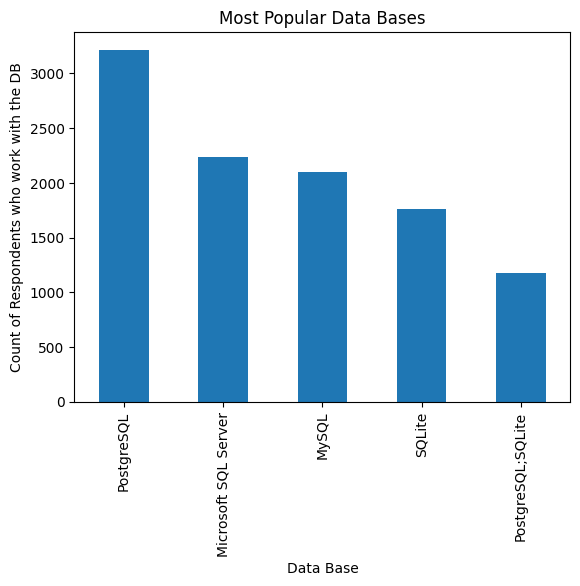

In [20]:
db_df['DatabaseHaveWorkedWith'].value_counts().plot.bar()
plt.title('Most Popular Data Bases')
plt.ylabel('Count of Respondents who work with the DB')
plt.xlabel('Data Base')
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



In [21]:
## Write your code here
median = df.groupby('Age')[['ConvertedCompYearly']].median()
median

,ConvertedCompYearly
Age,
18-24 years old,25000.0
25-34 years old,59825.0
35-44 years old,84796.0
45-54 years old,99099.0
55-64 years old,109691.0
65 years or older,106000.0
Prefer not to say,140000.0
Under 18 years old,7626.5


<Figure size 1200x700 with 0 Axes>

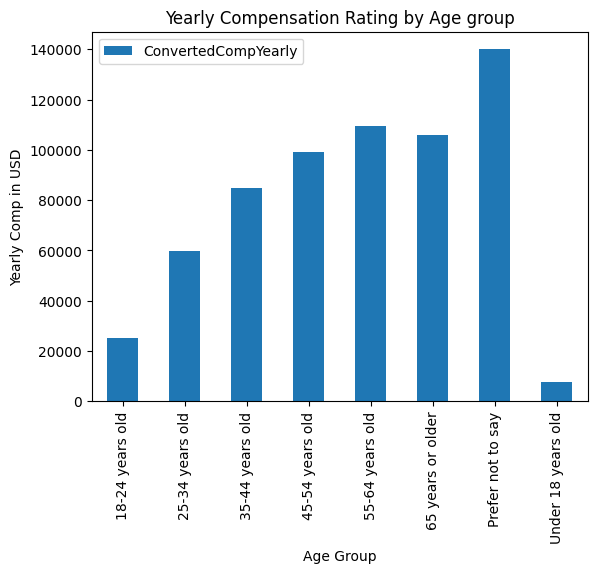

In [22]:
plt.figure(figsize = (12,7))
median.plot.bar()
plt.title('Yearly Compensation Rating by Age group')
plt.ylabel('Yearly Comp in USD')
plt.xlabel('Age Group')
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [23]:
## Write your code here
top20 = df['Country'].value_counts().head(20)
top20df = df[df['Country'].isin(top20.index)]


In [24]:
top20df['Country'].value_counts()

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
France                                                   2110
Canada                                                   2104
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Italy                                                    1341
Australia                                                1260
Spain                                                    1123
Sweden                                                   1016
Russian Federation                                        925
Switzerland                                               876


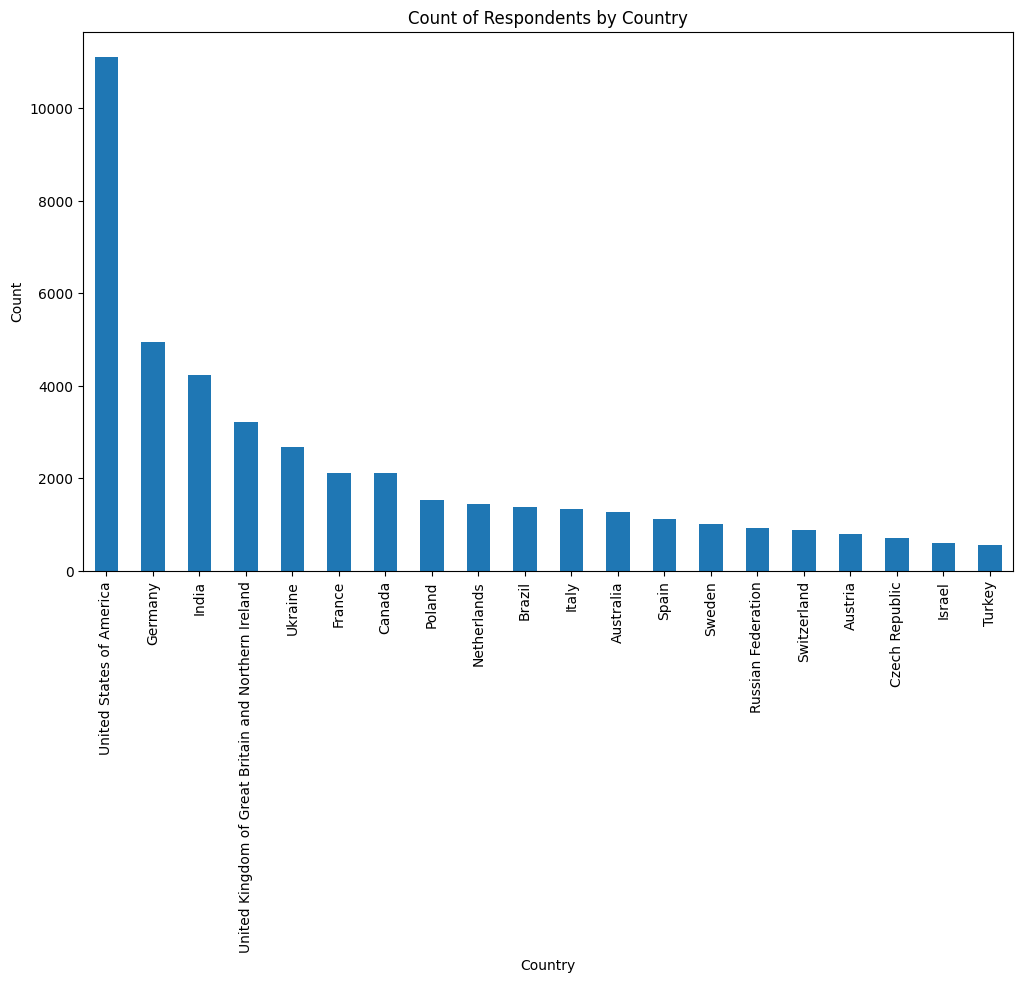

In [25]:
plt.figure(figsize = (12,7))
top20df['Country'].value_counts().plot.bar()
plt.title('Count of Respondents by Country')
plt.ylabel('Count')
plt.xlabel('Country')
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
